**MATH 3332 **

**Section 52 **

# In Who-is-Normal.xslx there are 7 columns representing variables x1-x7, one of which is sample from the normal distribution. Find which one of the variables is normal?

## Reading in Values

The program starts by reading in the values from the Excel spreadsheet after they have been exported to a CSV format.

In [1]:
import csv
f = open('input.csv', 'r')
reader = csv.reader(f)

values = []
for row in reader:
    values.append(row)

## Manipulating the Values

The program then transposes the matrix that was created when reading in the values from the CSV. The result is an array, where the rows consist of the name of the data (e.g., x1, x2) and the values for that distribution. 

In [2]:
import numpy as np
matrix = np.transpose(np.array(values))

## Creating the Probability Plot

The program then creates a plot for each distribution using the **scipy.stats** library. The plot contains the **plotted values**, the $R^2$ value, the **mean**, and the **standard deviation **.

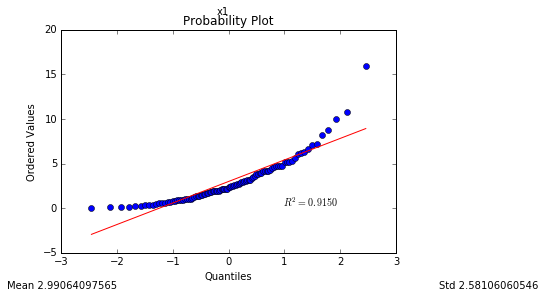

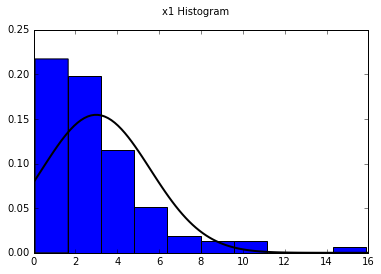

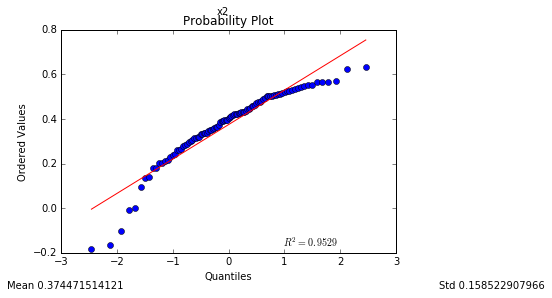

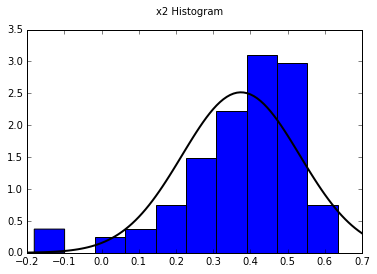

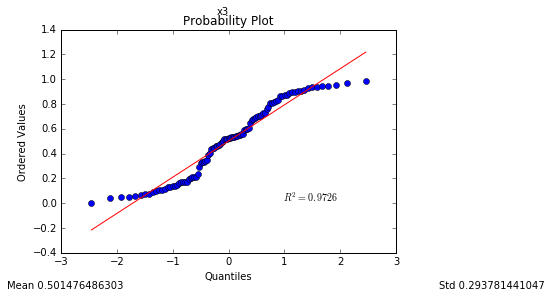

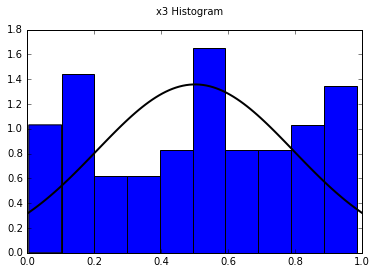

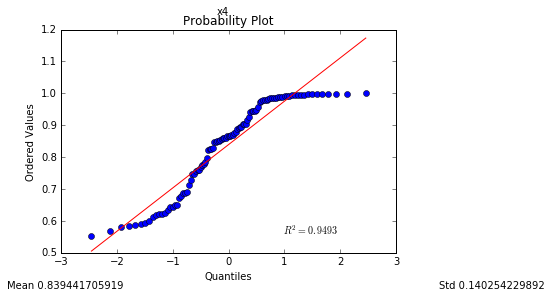

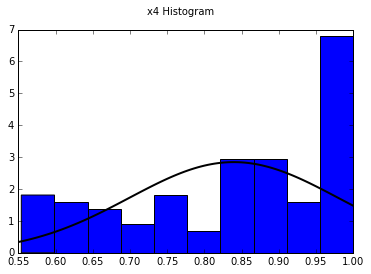

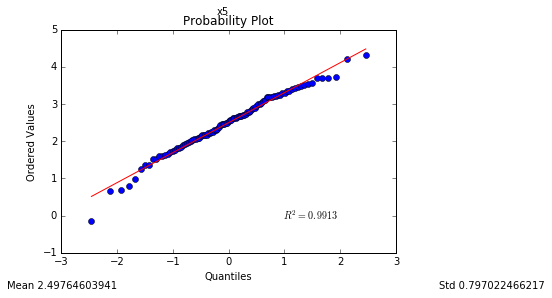

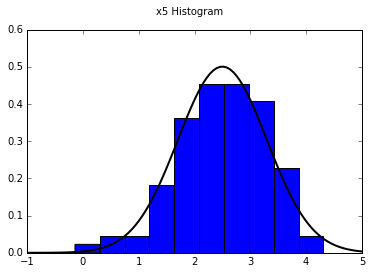

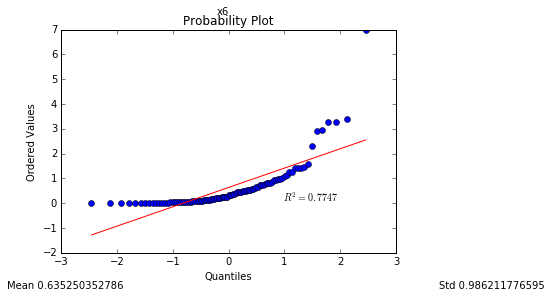

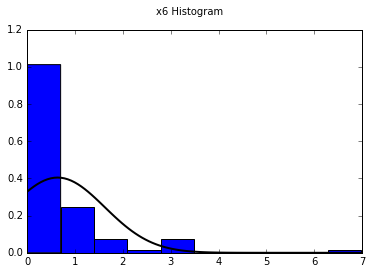

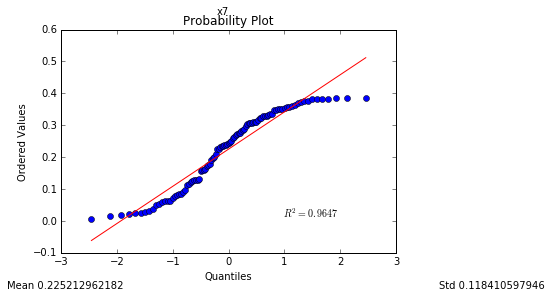

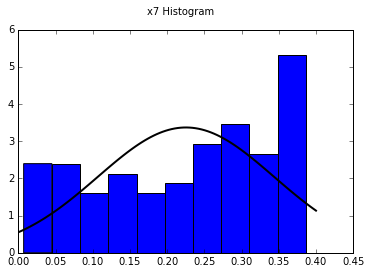

In [3]:
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
%matplotlib inline

# Iterate over each dataset (x1, x2, etc)
for x_column in xrange(len(matrix)):
    
    # Create array of float-type values from the dataset
    values = np.array(matrix[x_column][1:])
    values = [float(value) for value in values]
    
    # Create a seperate figure to create the probability plot
    fig = plt.figure()
    fig.text(0, 0, 'Mean %s' % np.mean(values))
    fig.text(1, 0, 'Std %s' % np.std(values))
    fig.suptitle('x%s' % (x_column + 1))
    # Produce the probability plot
    scipy.stats.probplot(values, plot=plt)
    
    # Create a separate figure to create the histogram
    fig2 = plt.figure()
    fig2.suptitle('x%s Histogram' % (x_column + 1))
    # Produce the histogram using normalized values
    plt.hist(values, normed=True)
    
    # Add the normal distribution curve to the plot
    mu, std = scipy.stats.norm.fit(values)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

plt.show()

## Answer

x5 is the normal distribution with an $R^2$ value of 0.9913, which is greater than any of the other distributions. 

Graphically, it can be seen in the histogram that it best fits the normal distribution curve as well. The other graphs do not fit the normal distribution curve, or they do not fit as well as x5.

## References
http://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

http://matplotlib.org/api/pyplot_api.html